In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def closest_node(data, t, map, m_rows, m_cols):
  # (row,col) of map node closest to data[t]
  result = (0,0)
  small_dist = 1.0e20
  for i in range(m_rows):
    for j in range(m_cols):
      ed = euc_dist(map[i][j], data[t])
      if ed < small_dist:
        small_dist = ed
        result = (i, j)
  return result

def euc_dist(v1, v2):
  return np.linalg.norm(v1 - v2) 

def manhattan_dist(r1, c1, r2, c2):
  return np.abs(r1-r2) + np.abs(c1-c2)

def most_common(lst, n):
  # lst is a list of values 0 . . n
  if len(lst) == 0: return -1
  counts = np.zeros(shape=n, dtype=np.int)
  for i in range(len(lst)):
    counts[lst[i]] += 1
  return np.argmax(counts)

In [ ]:
np.random.seed(1)
Dim = 4
Rows = 30; Cols = 30
RangeMax = Rows + Cols
LearnMax = 0.5
StepsMax = 5000

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
data_x = iris.data 
data_y = iris.target

In [ ]:
# 2. construct the SOM
print("Constructing a 30x30 SOM from the iris data")
map = np.random.random_sample(size=(Rows,Cols,Dim))
for s in range(StepsMax):
  if s % (StepsMax/10) == 0: print("step = ", str(s))
  pct_left = 1.0 - ((s * 1.0) / StepsMax)
  curr_range = (int)(pct_left * RangeMax)
  curr_rate = pct_left * LearnMax

  t = np.random.randint(len(data_x))
  (bmu_row, bmu_col) = closest_node(data_x, t, map, Rows, Cols)
  for i in range(Rows):
    for j in range(Cols):
      if manhattan_dist(bmu_row, bmu_col, i, j) < curr_range: 
        map[i][j] = map[i][j] + curr_rate * (data_x[t] - map[i][j])
print("SOM construction complete \n")

Constructing a 30x30 SOM from the iris data
step =  0
step =  500
step =  1000
step =  1500
step =  2000
step =  2500
step =  3000
step =  3500
step =  4000
step =  4500
SOM construction complete 



In [ ]:
# 3. construct U-Matrix
print("Constructing U-Matrix from SOM")
u_matrix = np.zeros(shape=(Rows,Cols), dtype=np.float64)
for i in range(Rows):
  for j in range(Cols):
    v = map[i][j]  # a vector 
    sum_dists = 0.0; ct = 0
    
    if i-1 >= 0:    # above
      sum_dists += euc_dist(v, map[i-1][j]); ct += 1
    if i+1 <= Rows-1:   # below
      sum_dists += euc_dist(v, map[i+1][j]); ct += 1
    if j-1 >= 0:   # left
      sum_dists += euc_dist(v, map[i][j-1]); ct += 1
    if j+1 <= Cols-1:   # right
      sum_dists += euc_dist(v, map[i][j+1]); ct += 1
    
    u_matrix[i][j] = sum_dists / ct
print("U-Matrix constructed \n")

Constructing U-Matrix from SOM
U-Matrix constructed 



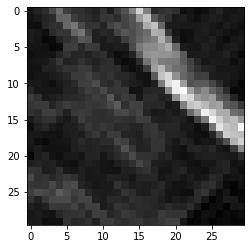

In [ ]:
# display U-Matrix
plt.imshow(u_matrix, cmap='gray')  # black = close = clusters
plt.show()

In [ ]:
# 4. because the data has labels, another possible visualization:
# associate each data label with a map node
print("Associating each data label to one map node ")
mapping = np.empty(shape=(Rows,Cols), dtype=object)
for i in range(Rows):
  for j in range(Cols):
    mapping[i][j] = []

for t in range(len(data_x)):
  (m_row, m_col) = closest_node(data_x, t, map, Rows, Cols)
  mapping[m_row][m_col].append(data_y[t])

label_map = np.zeros(shape=(Rows,Cols), dtype=np.int)
for i in range(Rows):
  for j in range(Cols):
    label_map[i][j] = most_common(mapping[i][j], 3)

plt.imshow(label_map, cmap=plt.cm.get_cmap('terrain_r', 4))
plt.colorbar()
plt.show()

@ https://github.com/JustGlowing/minisom 

In [ ]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-cp37-none-any.whl size=8603 sha256=af9c679702f9016ff69def9aea464aac018e6c4fd42ebab13abb79df6acf54d7
  Stored in directory: /root/.cache/pip/wheels/de/a0/08/5234d6b02b29c561f62b6c985e2eb7d480fb0b92359a8c74e4
Successfully built minisom


In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from minisom import Minisom
from pylab import plot,axis,show,pcolor,colorbar,bone

In [ ]:
digits = load_digits()
data = digits.data
labels = digits.target

Initiating SOM.

. SOM Processing Complete


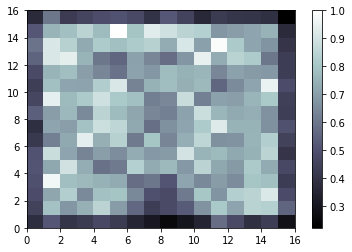

In [ ]:
som = MiniSom(16,16,64,sigma=1.0,learning_rate=0.5)
som.random_weights_init(data)
print("Initiating SOM.")
som.train_random(data,10000) 
print("\n. SOM Processing Complete")

bone()
pcolor(som.distance_map().T) 
colorbar()

In [ ]:
som.get_weights().shape

(16, 16, 64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: F

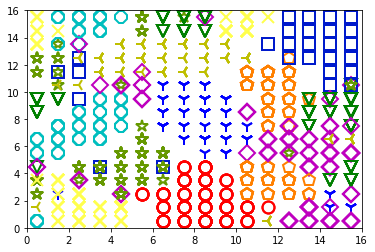

In [ ]:
labels[labels == '0'] = 0
labels[labels == '1'] = 1
labels[labels == '2'] = 2
labels[labels == '3'] = 3
labels[labels == '4'] = 4
labels[labels == '5'] = 5
labels[labels == '6'] = 6
labels[labels == '7'] = 7
labels[labels == '8'] = 8
labels[labels == '9'] = 9

markers = ['o', 'v', '1', '3', '8', 's', 'p', 'x', 'D', '*']
colors = ["r", "g", "b", "y", "c", (0,0.1,0.8), (1,0.5,0), (1,1,0.3), "m", (0.4,0.6,0)]
for cnt,xx in enumerate(data):
   w = som.winner(xx) 
   plot(w[0]+.5,w[1]+.5,markers[labels[cnt]],    
   markerfacecolor='None', markeredgecolor=colors[labels[cnt]], 
   markersize=12, markeredgewidth=2)
axis([0,som.get_weights().shape[0],0,som.get_weights().shape[1]])
show()

In [ ]:
#To visualize the quality of clustering of each neuron this map uses colors to 
#show the mean difference of the values corresponding to a neuron and the weights of the neuron. 
#Neurons that aren't winning neuron for any sample are left blank.
import plotly.graph_objects as go
win_map = som.win_map(data)
size=som.distance_map().shape[0]
qualities=np.empty((size,size))
qualities[:]=np.NaN
for position, values in win_map.items():
    qualities[position[0], position[1]] = np.mean(abs(values-som.get_weights()[position[0], position[1]]))

layout = go.Layout(title='quality plot')
fig = go.Figure(layout=layout)
fig.add_trace(go.Heatmap(z=qualities, colorscale='Viridis'))
fig.show()